<IPython.core.display.Javascript object>


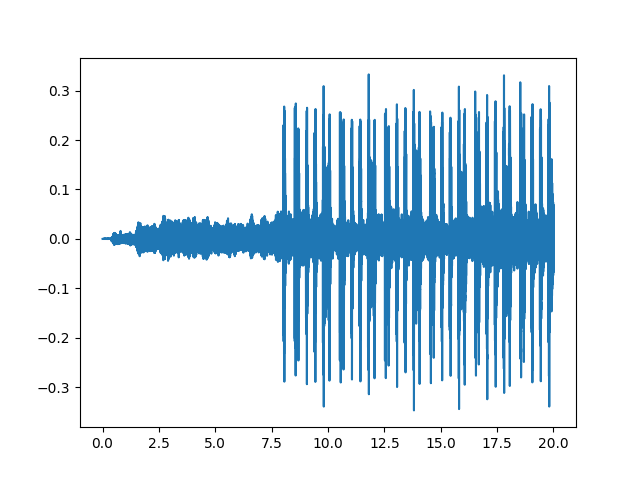

In [40]:
import numpy as np
import matplotlib.pyplot as plt
import essentia
import essentia.standard as esns

loader = essentia.standard.MonoLoader(filename='/home/illy/gdrive/aniproj/media_archive/BASS_DRUMS.mp3') # load audio with 44100Hz sample rate downmixed to mono
audio = loader() # load from loader to np ndarray
audio = audio[np.arange(44100*20)] # take only the first 20 seconds of the audio
F = 44100 #[Hz]
dT = 1/F 
N = int(len(audio))
T = np.linspace(0, (N-1)*dT, N)
## use essentia for onset detection
od = essentia.standard.OnsetDetection(method='complex')
w = essentia.standard.Windowing(type = 'hann') # window funciton
fft = essentia.standard.FFT() # this gives us a complex FFT
c2p = essentia.standard.CartesianToPolar() # and this turns it into a pair (magnitude, phase)
pool = essentia.standard.essentia.Pool()
# Computing onset detection functions.
for frame in essentia.standard.FrameGenerator(audio, frameSize = 512, hopSize = 512):
    mag, phase, = c2p(fft(w(frame)))
    pool.add('features.hfc', od(mag, phase))
# Phase 2: compute the actual onsets locations
onsets = essentia.standard.Onsets()
onsets_hfc = onsets(essentia.array([ pool['features.hfc'] ]),[ 1 ])
# plot 
plt.plot(T, audio) # plot the audio
#
# for onset in onsets_hfc: # plot lines for the onsets
#     plt.axvline(x=onset, color='red')
plt.show()